In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2


KeyboardInterrupt: 

In [ ]:
X = np.load('../data/data-aug-128-rgb.npy')
y = np.load('../data/label-aug-128-rgb.npy', allow_pickle=True)

In [9]:
X.shape

(7545, 128, 128, 3)

In [10]:
y.shape

(7545,)

In [ ]:
def split_data(data, labels, test_split=0.2):
    split = int(test_split * len(data))
    split = int(len(data) / split)
    X_train = np.array([])
    X_test = np.array([])
    y_train = np.array([])
    y_test = np.array([])
    for i in range(len(data)):
        #loop through the data and get every nth element
        if i % split == 0:
            if X_test.size == 0:
                X_test = np.array([data[i]])
                y_test = np.array([labels[i]])
            else:
                X_test = np.append(X_test, [data[i]], axis=0)
                y_test = np.append(y_test, [labels[i]], axis=0)
        else:
            if X_train.size == 0:
                X_train = np.array([data[i]])
                y_train = np.array([labels[i]])
            else:    
                X_train = np.append(X_train, [data[i]], axis=0)
                y_train = np.append(y_train, [labels[i]], axis=0)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = split_data(X, y, 0.4)

KeyboardInterrupt: 

In [ ]:
X_test, X_valid, y_test, y_valid = split_data(X_test, y_test, 0.5)

In [8]:
print(y_train[-1])
print(y_test[-1])
print(y_valid[-1])

z
z
z


In [9]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)


(3772, 128, 128, 3)
(1886, 128, 128, 3)
(1887, 128, 128, 3)
(3772,)
(1886,)
(1887,)


In [10]:
np.save('../data/X_train-data-aug-128-rgb.npy', X_train)
np.save('../data/X_valid-data-aug-128-rgb.npy', X_valid)
np.save('../data/X_test-data-aug-128-rgb.npy', X_test)
np.save('../data/y_train-data-aug-128-rgb.npy', y_train)
np.save('../data/y_valid-data-aug-128-rgb.npy', y_valid)
np.save('../data/y_test-data-aug-128-rgb.npy', y_test)

In [7]:
X_train = np.load('../data/X_train-data-aug-128-rgb.npy')
X_valid = np.load('../data/X_valid-data-aug-128-rgb.npy')
X_test = np.load('../data/X_test-data-aug-128-rgb.npy')
y_train = np.load('../data/y_train-data-aug-128-rgb.npy')
# y_valid = np.load('../data/y_valid-data-aug-128-rgb.npy')
y_test = np.load('../data/y_test-data-aug-128-rgb.npy')

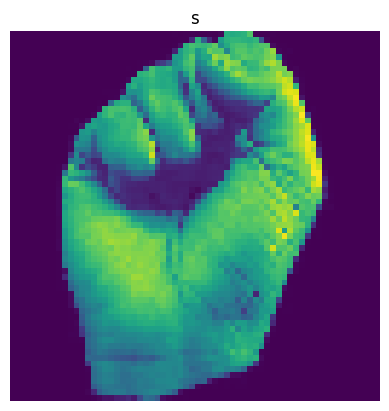

In [ ]:
plt.imshow(X_train[6000])
plt.title(y_train[6000])
plt.axis('off')
plt.show()

In [4]:
y_train_one_hot = pd.get_dummies(y_train, dtype=float)
y_train = np.array(y_train_one_hot)
y_train.shape

(3772, 36)

In [5]:
y_test_one_hot = pd.get_dummies(y_test, dtype=float)
y_test = np.array(y_test_one_hot)
y_test.shape

NameError: name 'y_test' is not defined

In [6]:
y_valid_one_hot = pd.get_dummies(y_valid, dtype=float)
y_valid = np.array(y_valid_one_hot)
y_valid.shape

NameError: name 'y_valid' is not defined

In [14]:
CNN = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(36, activation='softmax')
])

In [15]:
CNN.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [18]:
history = CNN.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid, y_valid))

Epoch 1/10
30/30 [==============================] - 63s 2s/step - loss: 0.3460 - accuracy: 0.8746 - val_loss: 0.3001 - val_accuracy: 0.8988
Epoch 2/10
30/30 [==============================] - 38s 1s/step - loss: 0.3171 - accuracy: 0.8799 - val_loss: 0.2635 - val_accuracy: 0.9062
Epoch 3/10
30/30 [==============================] - 37s 1s/step - loss: 0.3357 - accuracy: 0.8746 - val_loss: 0.2776 - val_accuracy: 0.9099
Epoch 4/10
30/30 [==============================] - 40s 1s/step - loss: 0.2994 - accuracy: 0.8887 - val_loss: 0.2698 - val_accuracy: 0.9110
Epoch 5/10
30/30 [==============================] - 37s 1s/step - loss: 0.3018 - accuracy: 0.8860 - val_loss: 0.3271 - val_accuracy: 0.8977
Epoch 6/10
30/30 [==============================] - 41s 1s/step - loss: 0.3301 - accuracy: 0.8780 - val_loss: 0.3039 - val_accuracy: 0.9051
Epoch 7/10
 1/30 [>.............................] - ETA: 27s - loss: 0.2965 - accuracy: 0.8672

KeyboardInterrupt: 

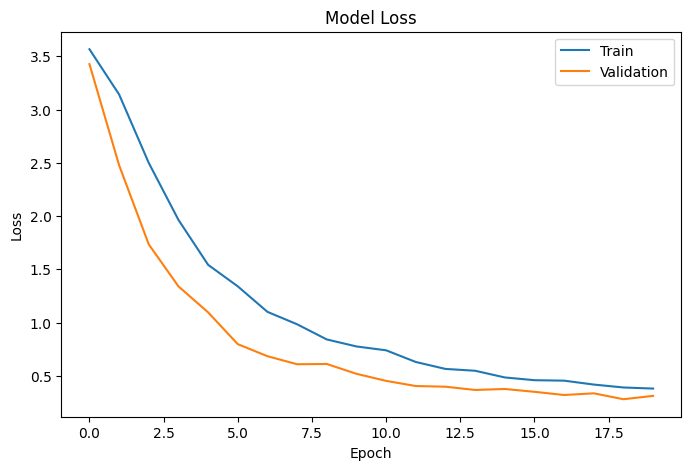

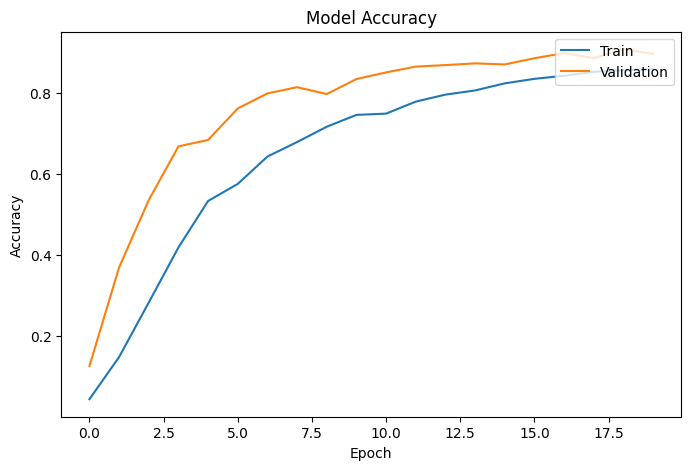

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [19]:
CNN.evaluate(X_test, y_test)

59/59 [==============================] - 5s 86ms/step - loss: 0.2741 - accuracy: 0.9077


[0.2741139531135559, 0.9077412486076355]

In [33]:
CNN.predict(X_test[-5].reshape(1, 128, 128, 3)).argmax()

1/1 [==============================] - 0s 32ms/step


35

In [31]:
y_test[-3].argmax()

35

In [34]:
CNN.save('../models/CNN-128-rgb-aug.h5')

c:\Users\luis\Desktop\Programs\finger-spelling-sign-language-model\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
from tensorflow.keras.models import load_model
CNN = load_model('../models/CNN-128-rgb-aug.h5')

In [36]:
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 124)       71548     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 124)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        71488     
                                                                 
 flatten_2 (Flatten)         (None, 50176)            

In [2]:
from handlandmark import get_hand_pixels

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
pixel = get_hand_pixels(frame)
cap.release()
plt.imshow(pixel[0])
plt.axis('off')
plt.show()

OSError: No file or directory found at models/CNN-128-rgb-aug.h5

In [80]:
pixel.shape

(1, 64, 64)

In [41]:
labels = np.load('../data/labels.npy', allow_pickle=True)

In [58]:
labels[CNN.predict(pixel[0].reshape(1, 128, 128, 3)).argmax()]

1/1 [==============================] - 0s 53ms/step


'6'

In [32]:
labels[16]

'g'